## Import Libraries

We will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert 
out data into a format suitable to feed our classification model. We'll use seaborn and matplotlib for visualizations.

In [16]:
#import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns

## Import Data

We have our data saved in a CSV file called train_new.csv which we will use to train our model and data which is present in test.csv, we will have to predict outcomes for it. We first read our dataset in a pandas dataframe called insuranceDF, and then use the head() function to show the first five records from our dataset.

In [17]:
#Import data
train_data=pd.read_csv('train_new.csv', index_col='RowNumber')
test_data=pd.read_csv('test.csv',index_col='RowNumber')

In [18]:
train_data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,15737888,Mitchell,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0
6,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,1,0,149756.71,1
7,15592531,Bartlett,822.0,France,Male,50.0,7,0.00,1,1,10062.80,0
8,15656148,Obinna,376.0,Germany,Female,29.0,4,115046.74,1,0,119346.88,1
9,15792365,He,501.0,France,Male,44.0,4,142051.07,0,1,74940.50,0


## Manupulation

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 12 columns):
CustomerId         5000 non-null int64
Surname            5000 non-null object
CreditScore        4993 non-null float64
Geography          5000 non-null object
Gender             5000 non-null object
Age                4985 non-null float64
Tenure             5000 non-null int64
Balance            5000 non-null float64
HasCrCard          5000 non-null int64
IsActiveMember     5000 non-null int64
EstimatedSalary    5000 non-null float64
Exited             5000 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 507.8+ KB


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 5001 to 10000
Data columns (total 11 columns):
CustomerId         5000 non-null int64
Surname            5000 non-null object
CreditScore        5000 non-null int64
Geography          5000 non-null object
Gender             5000 non-null object
Age                5000 non-null int64
Tenure             5000 non-null int64
Balance            5000 non-null float64
HasCrCard          5000 non-null int64
IsActiveMember     5000 non-null int64
EstimatedSalary    5000 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 468.8+ KB


In [21]:
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5.000000e+03,4993.000000,4985.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,1.569033e+07,650.387943,38.993781,5.009200,77051.932626,0.708600,0.51000,100343.748618,0.209200
std,7.158643e+04,97.818171,10.609730,2.879579,62417.714791,0.454453,0.49995,57708.381821,0.406778
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.000000,0.00000,11.580000,0.000000
25%,1.562816e+07,582.000000,32.000000,3.000000,0.000000,0.000000,0.00000,50870.902500,0.000000
50%,1.569001e+07,652.000000,37.000000,5.000000,97466.985000,1.000000,1.00000,100579.380000,0.000000
75%,1.575235e+07,717.000000,44.000000,7.000000,128032.042500,1.000000,1.00000,149107.817500,0.000000
max,1.581566e+07,1100.000000,88.000000,10.000000,250898.090000,1.000000,1.00000,199970.740000,1.000000


In [22]:
test_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.569155e+07,650.812200,38.855000,5.016400,75919.845950,0.702400,0.520200,99836.731144
std,7.228632e+04,95.778196,10.376739,2.904999,62378.194403,0.457248,0.499642,57316.570906
min,1.556571e+07,350.000000,18.000000,0.000000,0.000000,0.000000,0.000000,90.070000
25%,1.562898e+07,585.000000,32.000000,2.000000,0.000000,0.000000,0.000000,51358.462500
50%,1.569151e+07,651.000000,37.000000,5.000000,96778.940000,1.000000,1.000000,99875.635000
75%,1.575408e+07,718.000000,44.000000,7.250000,127298.047500,1.000000,1.000000,149511.647500
max,1.581569e+07,850.000000,92.000000,10.000000,222267.630000,1.000000,1.000000,199992.480000


In [23]:
#Create a column in test data so that we can merge this with train data and later we can saperate it.
test_data['Exited']=-999

In [24]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
5001,15598695,Fields,834,Germany,Female,68,9,130169.27,0,1,93112.20,-999
5002,15649354,Johnston,754,Spain,Male,35,4,0.00,1,1,9658.41,-999
5003,15737556,Vasilyev,590,France,Male,43,7,81076.80,1,1,182627.25,-999
5004,15671610,Hooper,740,France,Male,36,7,0.00,1,1,13177.40,-999
5005,15625092,Colombo,502,Germany,Female,57,3,101465.31,1,0,43568.31,-999


In [25]:
#concatenate train and test data to perform operation on both
total_data=pd.concat((train_data,test_data),axis=0)

In [26]:
#Check details about all features of the data    #till this done
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        9993 non-null float64
Geography          10000 non-null object
Gender             10000 non-null object
Age                9985 non-null float64
Tenure             10000 non-null int64
Balance            10000 non-null float64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 1015.6+ KB


In [27]:
#Check mathematical operations in one go..
total_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,9993.000000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.600220,38.924286,5.012800,76485.889288,0.70550,0.515100,100090.239881,-499.395400
std,7.193619e+04,96.798231,10.493410,2.892174,62397.405202,0.45584,0.499797,57510.492818,499.629665
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,-999.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,-999.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,-499.500000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,1100.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


In [28]:
#Top 5 records of the data
total_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,15737888,Mitchell,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0


In [29]:
#Last 5 records of the data
total_data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
9996,15606229,Obijiaku,771.0,France,Male,39.0,5,0.00,1,0,96270.64,-999
9997,15569892,Johnstone,516.0,France,Male,35.0,10,57369.61,1,1,101699.77,-999
9998,15584532,Liu,709.0,France,Female,36.0,7,0.00,0,1,42085.58,-999
9999,15682355,Sabbatini,772.0,Germany,Male,42.0,3,75075.31,1,0,92888.52,-999
10000,15628319,Walker,792.0,France,Female,28.0,4,130142.79,1,0,38190.78,-999


In [30]:
#Check individual column of the dataset
total_data['CreditScore'].head()

RowNumber
1     619.0
2     608.0
3     502.0
4     699.0
5    1100.0
Name: CreditScore, dtype: float64

In [31]:
#selecting multiple columns of the dataset
total_data[['Surname','Tenure']].head()

,Surname,Tenure
RowNumber,,
1,Hargrave,2
2,Hill,1
3,Onio,8
4,Boni,1
5,Mitchell,2


In [32]:
#using index
#before , is row and after  , is column
total_data.loc[1:10,]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,15737888,Mitchell,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0
6,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,1,0,149756.71,1
7,15592531,Bartlett,822.0,France,Male,50.0,7,0.00,1,1,10062.80,0
8,15656148,Obinna,376.0,Germany,Female,29.0,4,115046.74,1,0,119346.88,1
9,15792365,He,501.0,France,Male,44.0,4,142051.07,0,1,74940.50,0


In [33]:
#to get value till certain column
total_data.loc[5:10,'Age':'IsActiveMember']

,Age,Tenure,Balance,HasCrCard,IsActiveMember
RowNumber,,,,,
5,43.0,2,125510.82,1,1
6,44.0,8,113755.78,1,0
7,50.0,7,0.00,1,1
8,29.0,4,115046.74,1,0
9,44.0,4,142051.07,0,1
10,27.0,2,134603.88,1,1


In [34]:
#To get data of specific column
total_data.loc[5:10,['Age','Surname','CustomerId']]

,Age,Surname,CustomerId
RowNumber,,,
5,43.0,Mitchell,15737888
6,44.0,Chu,15574012
7,50.0,Bartlett,15592531
8,29.0,Obinna,15656148
9,44.0,He,15792365
10,27.0,H?,15592389


In [35]:
#position based indexing
total_data.iloc[1:8,1:4]  #index start from 0

,Surname,CreditScore,Geography
RowNumber,,,
2,Hill,608.0,Spain
3,Onio,502.0,France
4,Boni,699.0,France
5,Mitchell,1100.0,Spain
6,Chu,645.0,Spain
7,Bartlett,822.0,France
8,Obinna,376.0,Germany


## Numerical Feature

In [36]:
#centrality measures
print('Mean is : {}'.format(total_data.Balance.mean()))
print('Mean is : {}'.format(total_data.CreditScore.median()))
print('Mean and median is : {}, {}'.format(total_data.CreditScore.median(), total_data.CreditScore.mean()))

Mean is : 76485.889288
Mean is : 652.0
Mean and median is : 652.0, 650.600220154


In [ ]:
#for ploting graph
%matplotlib inline

In [37]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 96B7-B6A2

 Directory of C:\Users\671869\Documents\Personal\Training\Machine Learning Training

12/20/2018  06:46 PM    <DIR>          .
12/20/2018  06:46 PM    <DIR>          ..
12/18/2018  08:17 PM    <DIR>          .ipynb_checkpoints
12/18/2018  08:17 PM           308,697 440_505172_cf_baseline.ipynb
12/17/2018  07:29 PM            30,199 A Word on jupyter Notebook-01.ipynb
12/18/2018  08:01 PM         5,261,646 Catboost Algorithm final submission.ipynb
12/18/2018  06:59 PM             5,259 Conditional and Iteration-04.ipynb
12/18/2018  07:08 PM             5,780 Conditional and Iteration-05.ipynb
12/18/2018  06:53 PM            16,185 Data Structure-03.ipynb
12/14/2018  06:04 PM    <DIR>          InsuranceClaimPredictionSample01-master
12/14/2018  04:29 PM            41,158 InsuranceClaimPredictionSample01-master.zip
12/19/2018  08:05 PM         2,836,160 Introduction TO DATA SCIENCE_Training.pptx
12/18/2018  07:37 PM         

In [39]:
%time a=range(1000)

Wall time: 0 ns


In [40]:
%timeit a=range(1000)
x=max(a)

The slowest run took 5.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.74 µs per loop


                 CustomerId  CreditScore       Age    Tenure   Balance  \
CustomerId         1.000000     0.005916  0.009504 -0.014883 -0.012419   
CreditScore        0.005916     1.000000 -0.003587  0.001349  0.006565   
Age                0.009504    -0.003587  1.000000 -0.009852  0.028260   
Tenure            -0.014883     0.001349 -0.009852  1.000000 -0.012254   
Balance           -0.012419     0.006565  0.028260 -0.012254  1.000000   
HasCrCard         -0.014025    -0.005416 -0.011759  0.022583 -0.014858   
IsActiveMember     0.001665     0.025579  0.085793 -0.028362 -0.010084   
EstimatedSalary    0.015271    -0.001332 -0.007277  0.007784  0.012797   
Exited            -0.008430    -0.002201  0.006731 -0.001250  0.009112   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CustomerId       -0.014025        0.001665         0.015271 -0.008430  
CreditScore      -0.005416        0.025579        -0.001332 -0.002201  
Age              -0.011759        0.085793 

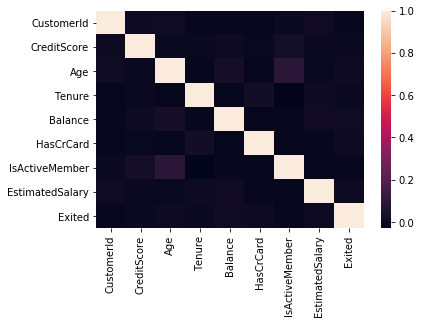

In [42]:
import seaborn as sns
#finding corelation in our data
corr = total_data.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

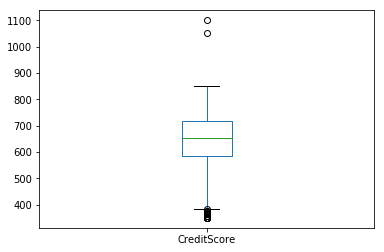

In [43]:
#Box plot#Box plot 
total_data.CreditScore.plot('box')

## categorical feature

In [44]:
# to get description of categorical features include all in parameter
total_data.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,9993.000000,10000,10000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.600220,NaN,NaN,38.924286,5.012800,76485.889288,0.70550,0.515100,100090.239881,-499.395400
std,7.193619e+04,NaN,96.798231,NaN,NaN,10.493410,2.892174,62397.405202,0.45584,0.499797,57510.492818,499.629665
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,-999.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,-999.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,-499.500000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000


In [45]:
#To get value count of customer who exited and not
total_data[total_data.Exited!=-999].Exited.value_counts()

0    3954
1    1046
Name: Exited, dtype: int64

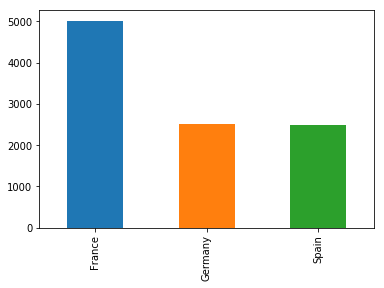

In [46]:
#visualise counts
total_data.Geography.value_counts().plot(kind='bar')

## Ditributions

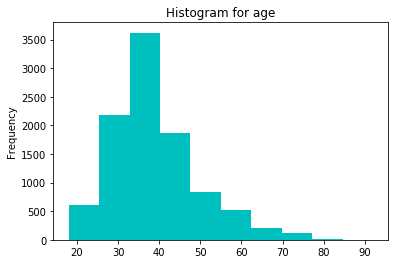

In [49]:
#use hist to create histogram
total_data.Age.plot(kind='hist',title='Histogram for age',color='c')

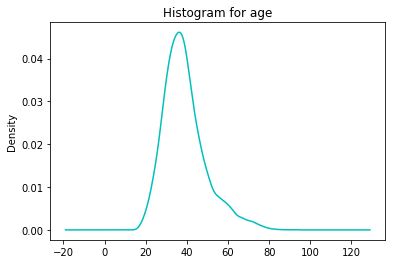

In [50]:
#use kde plot
total_data.Age.plot(kind='kde',title='Histogram for age',color='c')

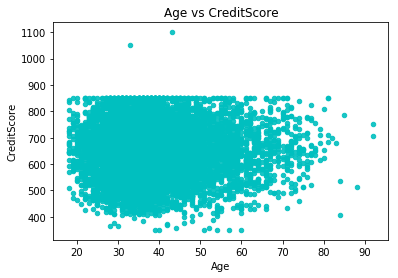

In [54]:
#use hist to create histogram
total_data.plot.scatter(x='Age',y='CreditScore',color='c',title='Age vs CreditScore',alpha=0.9)

## Grouping

In [55]:
#group by#group by
total_data.groupby('Gender').Age.median()

Gender
Female    38.0
Male      37.0
Name: Age, dtype: float64

In [56]:
total_data.groupby(['Gender'])['EstimatedSalary','Age'].median()

,EstimatedSalary,Age
Gender,,
Female,101905.34,38.0
Male,98060.51,37.0


In [57]:
total_data.groupby(['Gender']).agg({'EstimatedSalary':'mean','Age':'median'})

,Age,EstimatedSalary
Gender,,
Female,38.0,100601.541382
Male,37.0,99664.576931


## Remove the columns which is of no use

In [58]:
#drop the columns which is of no use
total_data.drop(['CustomerId','Surname'],axis=1,inplace=True)
total_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0


## Working with missing values

In [63]:
#check for missing values
#train_data_processed.loc[train_data.Age.isnull()]
total_data.loc[total_data.CreditScore.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,


In [60]:
total_data.CreditScore.mean()

650.6002201541079

In [61]:
total_data[total_data.Gender=='Male'].CreditScore.mean()

650.2800293416468

In [62]:
total_data.CreditScore.fillna(650,inplace=True)

In [68]:
total_data.loc[total_data.Age.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,


In [66]:
total_data.Age.mean()

38.92428642964447

In [67]:
total_data.Age.fillna(39,inplace=True)

In [69]:
#check if there is any null value rows left
total_data.loc[total_data.Age.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,


## Working with outliers

In [73]:
total_data.loc[total_data.CreditScore >1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,


In [71]:
total_data[total_data.Gender=='Female'].CreditScore.mean()

650.9841514417785

In [72]:
total_data['CreditScore'].replace([1100,1050], 651,inplace=True)

## Split train and test data

In [ ]:
#train data#train da 
total_data.loc[total_data.Exited!=-999].to_csv('train_processed')
#test data
columns=[column for column in total_data.columns if column!='Exited']
total_data.loc[total_data.Exited==-999,columns].to_csv('test_processed')

## Import Processed data

In [ ]:
#Import data
train_data_processed=pd.read_csv('train_processed.csv', index_col='RowNumber')
test_data_processed=pd.read_csv('test_processed.csv',index_col='RowNumber')

## Seprating dependent and independent variable

In [ ]:
train_data_processed.head()

In [ ]:
X=train_data_processed.iloc[:,:9].values
y=train_data_processed.iloc[:,9].values

In [ ]:
y

## Encoding Categorical Variables

In [ ]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencode_X1=LabelEncoder()
X[:,1]=labelencode_X1.fit_transform(X[:,1])
labelencode_X2=LabelEncoder()
X[:,2]=labelencode_X1.fit_transform(X[:,2])

In [ ]:
onehotencode=OneHotEncoder(categorical_features=[1])
X=onehotencode.fit_transform(X).toarray()

In [ ]:
X.shape

In [ ]:
test_df=pd.DataFrame(data=X[:,:])
test_df.head()

## Training And Validation Split

In [ ]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Logistic Classifier Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

In [ ]:
y_pred_logistic=classifier.predict(X_test)

In [ ]:
classifier.coef_

## Checking Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf_met=confusion_matrix(y_test,y_pred_logistic)
acc_logistic=accuracy_score(y_test,y_pred_logistic)
print(acc_logistic)
print(conf_met)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_classifier=RandomForestClassifier(n_estimators=10 ,random_state=0)
rand_classifier.fit(X_train,y_train)

In [ ]:
y_pred_rand=rand_classifier.predict(X_test)
conf_met_rand=confusion_matrix(y_test,y_pred_rand)
acc_rand=accuracy_score(y_test,y_pred_rand)
print(acc_rand)
print(conf_met_rand)

## Support Vector 

In [ ]:
from sklearn.svm import SVC
class_svc=SVC(kernel='rbf',random_state=0,probability=True)
class_svc.fit(X_train,y_train)

In [ ]:
y_pred_svc=class_svc.predict(X_test)
conf_met_svc=confusion_matrix(y_test,y_pred_svc)
acc_svc=accuracy_score(y_test,y_pred_svc)
print(acc_svc)
print(conf_met_svc)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
class_tree=DecisionTreeClassifier(random_state=0)
class_tree.fit(X_train,y_train)

In [ ]:
y_pred_tree=class_tree.predict(X_test)
conf_met_tree=confusion_matrix(y_test,y_pred_tree)
acc_tree=accuracy_score(y_test,y_pred_tree)
print(acc_tree)
print(conf_met_tree)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
class_naive=DecisionTreeClassifier(random_state=0)
class_naive.fit(X_train,y_train)

In [ ]:
y_pred_naive=class_naive.predict(X_test)
conf_met_naive=confusion_matrix(y_test,y_pred_naive)
acc_naive=accuracy_score(y_test,y_pred_naive)
print(acc_naive)
print(conf_met_naive)

In [ ]:
from xgboost import XGBClassifier
class_xgboost=XGBClassifier(random_state=0)
class_xgboost.fit(X_train,y_train)

In [ ]:
y_pred_xgboost=class_naive.predict(X_test)
conf_met_xgboost=confusion_matrix(y_test,y_pred_xgboost)
acc_xgboost=accuracy_score(y_test,y_pred_xgboost)
print(acc_xgboost)
print(conf_met_xgboost)

In [ ]:
from sklearn.model_selection import KFold
cross_val=KFold(n_splits=2)

## HyperParameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'kernel':['linear','poly','rbf']}
clf=GridSearchCV(class_svc,param_grid=parameters,cv=3)
clf=GridSearchCV

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.best_params_

In [ ]:
print('Best Score is: {0:.2f}'.format(clf.best_score_))